In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [6]:
data = pd.read_csv('nifty50.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,13-4-23,17807,17842,17730,17828,26460
1,17-04-2023,17863,17863,17574,17707,35119
2,18-04-2023,17767,17767,17610,17660,23033
3,19-04-2023,17653,17666,17580,17619,21562
4,20-04-2023,17639,17684,17584,17624,19457


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    249 non-null    object
 1   Open    249 non-null    int64 
 2   High    249 non-null    int64 
 3   Low     249 non-null    int64 
 4   Close   249 non-null    int64 
 5   Volume  249 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.8+ KB


In [8]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    249 non-null    object
 1   Open    249 non-null    int64 
 2   High    249 non-null    int64 
 3   Low     249 non-null    int64 
 4   Close   249 non-null    int64 
 5   Volume  249 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.8+ KB


In [10]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(249, 1)

In [15]:
X_train = []
y_train = []

for i in range (60,249): #60 : timestep // 249 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
print(X_train)
print(y_train)


[[4.07010711e-02 1.71372931e-02 7.98442064e-03 ... 3.65725414e-01
  3.33592989e-01 3.38266796e-01]
 [1.71372931e-02 7.98442064e-03 0.00000000e+00 ... 3.33592989e-01
  3.38266796e-01 3.54430380e-01]
 [7.98442064e-03 0.00000000e+00 9.73709834e-04 ... 3.38266796e-01
  3.54430380e-01 3.43719572e-01]
 ...
 [7.84420643e-01 8.32716650e-01 8.72054528e-01 ... 9.53456670e-01
  9.53261928e-01 9.82862707e-01]
 [8.32716650e-01 8.72054528e-01 8.59396300e-01 ... 9.53261928e-01
  9.82862707e-01 9.78383642e-01]
 [8.72054528e-01 8.59396300e-01 7.69814995e-01 ... 9.82862707e-01
  9.78383642e-01 1.00000000e+00]]
[0.35443038 0.34371957 0.34956183 0.37896787 0.40740019 0.41480039
 0.43115871 0.45959104 0.41402142 0.39980526 0.40155794 0.42044791
 0.39746835 0.39474197 0.4157741  0.41187926 0.37156767 0.34333009
 0.36962025 0.38519961 0.38013632 0.39221032 0.37468354 0.35228822
 0.35365141 0.35949367 0.34001947 0.32930867 0.34566699 0.34605648
 0.35540409 0.3443038  0.32074002 0.3285297  0.33573515 0.3365141

In [12]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(189, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [15]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
6/6 - 2s - 362ms/step - loss: 0.1474
Epoch 2/20
6/6 - 0s - 81ms/step - loss: 0.0454
Epoch 3/20
6/6 - 0s - 80ms/step - loss: 0.0213
Epoch 4/20
6/6 - 0s - 81ms/step - loss: 0.0215
Epoch 5/20
6/6 - 0s - 81ms/step - loss: 0.0166
Epoch 6/20
6/6 - 0s - 80ms/step - loss: 0.0119
Epoch 7/20
6/6 - 0s - 80ms/step - loss: 0.0100
Epoch 8/20
6/6 - 0s - 81ms/step - loss: 0.0098
Epoch 9/20
6/6 - 0s - 81ms/step - loss: 0.0101
Epoch 10/20
6/6 - 0s - 80ms/step - loss: 0.0077
Epoch 11/20
6/6 - 0s - 81ms/step - loss: 0.0081
Epoch 12/20
6/6 - 0s - 83ms/step - loss: 0.0087
Epoch 13/20
6/6 - 0s - 83ms/step - loss: 0.0082
Epoch 14/20
6/6 - 0s - 80ms/step - loss: 0.0089
Epoch 15/20
6/6 - 0s - 81ms/step - loss: 0.0097
Epoch 16/20
6/6 - 0s - 82ms/step - loss: 0.0085
Epoch 17/20
6/6 - 0s - 83ms/step - loss: 0.0084
Epoch 18/20
6/6 - 1s - 84ms/step - loss: 0.0075
Epoch 19/20
6/6 - 0s - 83ms/step - loss: 0.0092
Epoch 20/20
6/6 - 0s - 83ms/step - loss: 0.0082


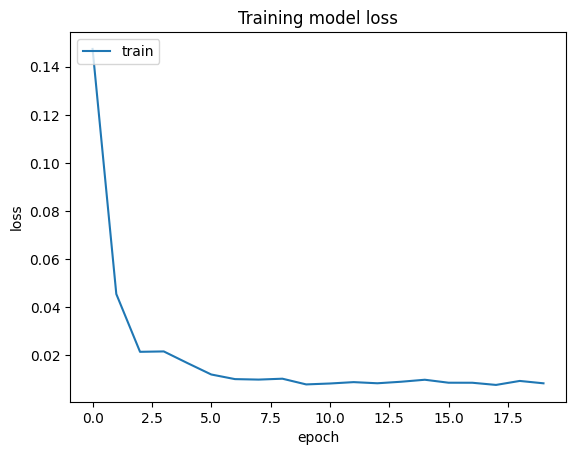

In [16]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [26]:
testData = pd.read_csv('nifty50.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(189, 60, 1)

In [28]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.30015916],
       [0.3095978 ],
       [0.31922933],
       [0.32872254],
       [0.33791873],
       [0.34685147],
       [0.35562557],
       [0.36438888],
       [0.37335575],
       [0.38247502],
       [0.39149994],
       [0.40013093],
       [0.40817088],
       [0.41539618],
       [0.4216171 ],
       [0.42680684],
       [0.43100977],
       [0.434146  ],
       [0.43602327],
       [0.43660906],
       [0.43605554],
       [0.43458444],
       [0.4324973 ],
       [0.43002158],
       [0.42724282],
       [0.42420548],
       [0.42097574],
       [0.41755444],
       [0.41389775],
       [0.4100489 ],
       [0.40610075],
       [0.40220731],
       [0.3984807 ],
       [0.39490545],
       [0.39146197],
       [0.3881711 ],
       [0.38507527],
       [0.38214675],
       [0.3794893 ],
       [0.3773085 ],
       [0.37583017],
       [0.37524426],
       [0.37574273],
       [0.3775012 ],
       [0.38073033],
       [0.38552448],
       [0.39188707],
       [0.399

In [20]:
predicted_price = sc.inverse_transform(y_pred)

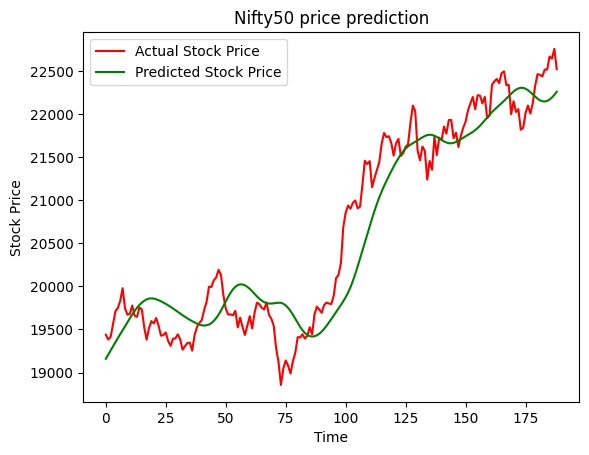

In [29]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Nifty50 price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()